# Live Analysis of Performance in Cricket Matches 

### A tutorial by Avi Ganguli



## Introduction

Cricket is a sport with a surprising but profound connection with the United States. To the surprise of many cricket fans around the world and sports fans in the United States, the first international match in cricket history was held in Bloomingdale Park in New York in the Fall of 1844. However, since then, cricket in the United States has lost its way and instead been replaced by a conceptually similar yet fundamentally different sport in baseball. It may be helpful to look at the Wikipedia page for cricket, https://en.wikipedia.org/wiki/Cricket. 

Cricket is a sport which generates a large amount of statistics each match. Matches can last upto 5 days and involve a rotation of several roles (batting, bowling and fielding) each with it's own distinct set of independent parameters to judge by. This data is then very well tabulated and recorded by a group of cricket sites which provide an excellent online coverage of cricket while their commentators also combine useful match insights and statistics with ball by ball coverage and description of match action. Perhaps, the foremost of these websites, ESPN Cricinfo is the site we will be using to gather data for this demonstration. However, much of the statistical analysis of the game is done after the conclusion of a match or the end of the day. Here, we aim to combine existing data and live data to make meaningful inferences about the result of the game and the performance of both teams. The API that we will be using to do this, `python-espncricinfo`, fetches the data on ESPN Cricinfo and presents it in a easy-to-use manner. 

## Getting Started

First, let's try to install the API so we can get started. To install `python-espncricinfo` (not in Anaconda by default): `pip install python-espncricinfo`

You may have to remove the following lines in the match.py file:

`from espncricinfo.exceptions import MatchNotFoundError, NoScorecardError`
 
 and the following lines in the get_json method:
 
`if r.status_code == 404:
   raise MatchNotFoundError
elif 'Scorecard not yet available' in r.text:
   raise NoScorecardError`

Now, let's get acquainted with the API by getting some basic data. The API has three basic classes that should be introduced first.

In [30]:
from espncricinfo.player import Player
from espncricinfo.summary import Summary
from espncricinfo.match import Match
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn # or alternatively plt.style.use('ggplot') for a similar look
import numpy as np
import math
from textwrap import fill

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)

## Overview of ESPNCricinfo API

These three classes are rather self-explanatory. The Player class contains highly detailed information about a specific player and thus contains many different attributes of which we will only be using a select few. The Summary class provides information about live/recent matches and allows us to make insights about on-going/recently concluded matches. The Matches class gives us detailed information about a given match and also containts a myriad of attributes, most of which will not be used here.

Let us take a look at some basic features these classes provide.


In [31]:
major_countries = set(["Australia", "Sri Lanka", "West Indies", "Zimbabwe", "New Zealand",
                       "India", "Pakistan", "Bangladesh", "South Africa", "England"])

The above 10 countries represent the countries with teams that are considered to compete at the highest level.

In [32]:
#gets on-going matches that involve one of the major teams defined above
def get_major_current_matches():
    summary = Summary()
    major_matches = []
    for match in summary.all_matches:
        if match["team1_name"] in major_countries or match["team2_name"] in major_countries:
            major_matches.append(match)
    return major_matches

current_major_matches = get_major_current_matches()
print current_major_matches

[{u'team2_name': u'Zimbabwe', u'live_state': u'Stumps', u'team2_score': u' 373', u'url': u'/zimbabwe-v-sri-lanka-2016-17/engine/match/1059702.html', u'team1_name': u'Sri Lanka', u'live_match': u'Y', u'team1_abbrev': u'SL', u'team1_score': u' 537 &amp; 247/6 (61.5&nbsp;ov)', u'team2_abbrev': u'ZIM'}, {u'team2_name': u'West Indies', u'team2_score': u' 337', u'url': u'/pakistan-v-west-indies-2016-17/engine/match/1050233.html', u'team1_name': u'Pakistan', u'live_match': u'Y', u'team1_abbrev': u'PAK', u'team1_score': u' 281 &amp; 103/4 (42.3&nbsp;ov)', u'team2_abbrev': u'WI'}]


The above code looks in the current matches being played avaliable through the Summary object and finds all those that involve the countries we defined to be major. Note that this data is live. As we can see above, there is a match going on now between Pakistan and West Indies that we have got the data for. Let's try to do something more interesting with this.

In [33]:
#parses the given url and obtains match id
def parse_url(summary_dict):
    url = summary_dict["url"]
    parsed_url_arr = url.rsplit('/', 1)
    parsed_w_ext = parsed_url_arr[-1]
    parsed_w_ext_arr = parsed_w_ext.split('.')
    parsed_url = parsed_w_ext_arr[0]
    return parsed_url


Now that we have a helper function that allows us to get the match id from the url, we can use the Match object to get some more detailed information about the current major matches.

In [34]:
#gets match objects from list of summary dictionaries 
def get_matches(summary_matches):
    result = []
    for match_dict in summary_matches:
        match_id = parse_url(match_dict)
        try: #account for errors in API
            match = Match(match_id)
            result.append(match)
        except:
            continue
    return result

#gets rosters for teams playing in match
def get_rosters(match):
    return ([player["card_long"] for player in match.team_1["player"]], 
    [player["card_long"] for player in match.team_2["player"]])

matches = get_matches(current_major_matches)
for match in matches:
    match_info = match.description
    match_class = match.match_class
    rosterA, rosterB = get_rosters(match)
    print "Team 1: " + match.team_1["team_name"] + "\n" + "\n".join(rosterA)
    print "Team 2: " + match.team_2["team_name"] + "\n" + "\n".join(rosterB)
    print "Location: " + match.ground_name + ", " + match.town_name
    print "Series: " + match.series[0]["series_name"]
    
#Consider one match for now
match = matches[0]
rosterA, rosterB = get_rosters(matches[0])

Team 1: Zimbabwe
TMK Mawoyo
BB Chari
H Masakadza
CR Ervine
SC Williams
MN Waller
PJ Moor
AG Cremer
DT Tiripano
CT Mumba
CB Mpofu
Team 2: Sri Lanka
FDM Karunaratne
JK Silva
MDKJ Perera
BKG Mendis
WU Tharanga
DM de Silva
DAS Gunaratne
MDK Perera
HMRKB Herath
RAS Lakmal
CBRLS Kumara
Location: Harare Sports Club, Harare
Series: Sri Lanka in Zimbabwe Test Series
Team 1: Pakistan
Sami Aslam
Azhar Ali
Asad Shafiq
Younis Khan
Misbah-ul-Haq
Sarfraz Ahmed
Mohammad Nawaz (3)
Wahab Riaz
Yasir Shah
Mohammad Amir
Zulfiqar Babar
Team 2: West Indies
KC Brathwaite
LR Johnson
DM Bravo
MN Samuels
J Blackwood
RL Chase
SO Dowrich
JO Holder
D Bishoo
AS Joseph
ST Gabriel
Location: Sharjah Cricket Stadium, Sharjah
Series: Pakistan v West Indies Test Series


Now, we have a list match objects and a plethora of information as we see above where we obtained the team rosters, location and series name. However, let's analyze the most recent match for now. We haven't really gotten into the in-depth quantitiative data yet. The Player class helps us do that as shown below.

In [35]:
#returns player data for given name and team if available
def get_Player(playerName, team):
    for player in team["player"]:
        if player["card_long"] == playerName:
            pid = player["object_id"]
            try:
                #data not available at moment : API problem
                result = Player(pid)
            except:
                result = None
            return result
    return None

#populate teams with available player data
def populate_team(roster, team, objects):
    result = []
    for name in roster:
        player = get_Player(name, team)
        if player!=None: #no data: API error
            objects.append(player)
            player_name = player.name
            role = player.playing_role
            if role!=None:  #no role data available'
                role = player.playing_role
            else:
                role = "Not available"
            result.append((player_name, role))
    return result

teamA_objects = []
teamB_objects = []
teamA_players = populate_team(rosterA, match.team_1, teamA_objects)
teamB_players = populate_team(rosterB, match.team_2, teamB_objects)

print teamA_players, len(teamA_players)
print teamB_players, len(teamB_players)

[(u'Brian Chari', u'Opening batsman'), (u'Craig Ervine', u'Middle-order batsman'), (u'Sean Williams', u'Middle-order batsman'), (u'Malcolm Waller', u'Batsman'), (u'Peter Moor', u'Middle-order batsman'), (u'Graeme Cremer', u'Bowler'), (u'Donald Tiripano', u'Bowler'), (u'Carl Mumba', 'Not available'), (u'Chris Mpofu', u'Bowler')] 9
[(u'Dimuth Karunaratne', u'Opening batsman'), (u'Kusal Perera', u'Wicketkeeper batsman'), (u'Kusal Mendis', u'Wicketkeeper batsman'), (u'Dhananjaya de Silva', u'Allrounder'), (u'Asela Gunaratne', u'Batsman'), (u'Suranga Lakmal', u'Bowler'), (u'Lahiru Kumara', 'Not available')] 7


## Classification

Now, that we have the player objects and we've seen what they can do, we saw that we can get some useful information about them. Just the player names and roles can give us a starting point for analysis. Let's go through some basic things first though as you'll be seeing these terms throughout the analysis. There are three major roles in cricket: Batsmen, Bowler and Allrounder. These represent the two major parts of cricket and where they specialize in, batting and bowling or in the case of allrounders both. These roles are the second element of the list of tuples we see above. As you may have read in the wikipedia article, cricket is a game of 11 members per team so you may be surprised why we have less than 11. The answer is rather tame: we simply do not have data for these players due to inadequacies in the API. Let's get back to the discussion on roles. For batting, we will be considering one major metric for every player, their average which determines how many runs they score every match. For bowlers, we look at both the runs they conceded and balls they bowl before they succeed in getting a batsmen out. As allrounders are a unique case, we use the difference between their batting average and bowling average as a measure of their skill. Now, let's classify try to show this in the data we collected.


In [100]:
#guess role when role data is absent
def guess_role(player):
    count = 0
    bat_avg = 0
    bowl_avg = 0
    for data in player.batting_fielding_averages:
        for level, average in data.iteritems():
            bat_avg+=float(average[5][1]) #average is in the 6th index
            count+=1
    bat_avg/= count if count > 0 else 1
    count = 0
    for data in player.bowling_averages:
        for level, average in data.iteritems():
            bowl_avg+=float(average[7][1]) #average is in the 7th index
            count+=1
    bowl_avg/= count if count > 0 else 1
    if bat_avg > 20 and bowl_avg < 40:
        return "allrounder"
    if bowl_avg < 40:
        return "bowler"
    if bat_avg > 20:
        return "batsman"
    else:
        return "allrounder"
        
    
#classifies all players and divides them into classifications
def classify_players(player_objects):
    batsmen = []
    all_rounder = []
    bowler = []
    for obj in player_objects:
        role = obj.playing_role
        if role == None:
            role = guess_role(obj).lower()
        role = role.lower()
        if "batsman" in role:
            batsmen.append(obj)
        if "bowler" in role:
            bowler.append(obj)
        if "allrounder" in role:
            all_rounder.append(obj)
    return batsmen, bowler, all_rounder

teamA_bat, teamA_bowl, teamA_all = classify_players(teamA_objects)
teamB_bat, teamB_bowl, teamB_all = classify_players(teamB_objects)

## Visualization

It's evident that players with different roles cannot be compared in a very meaningful way to each other. Thus, the first step in analyzing performance is to actually divide them up into the roles we said before. As we said before, for players who have just debuted the role data can be incomplete. In order to classify those edge cases, we have guessed the roles of the players based on their domestic performances and used a conventional perspective of what classifies a player into a particular position to decide roles. We will now visualize the player's respective capabilities according to the classifications we have made. The code for this visualization is long and partially obfuscated due to the customization of the plot. More importantly, it is not directly related to the goal of this tutorial, so we have omitted the code from this notebook. However, if one is interested in how this was done, take a look at `visualize.py`.

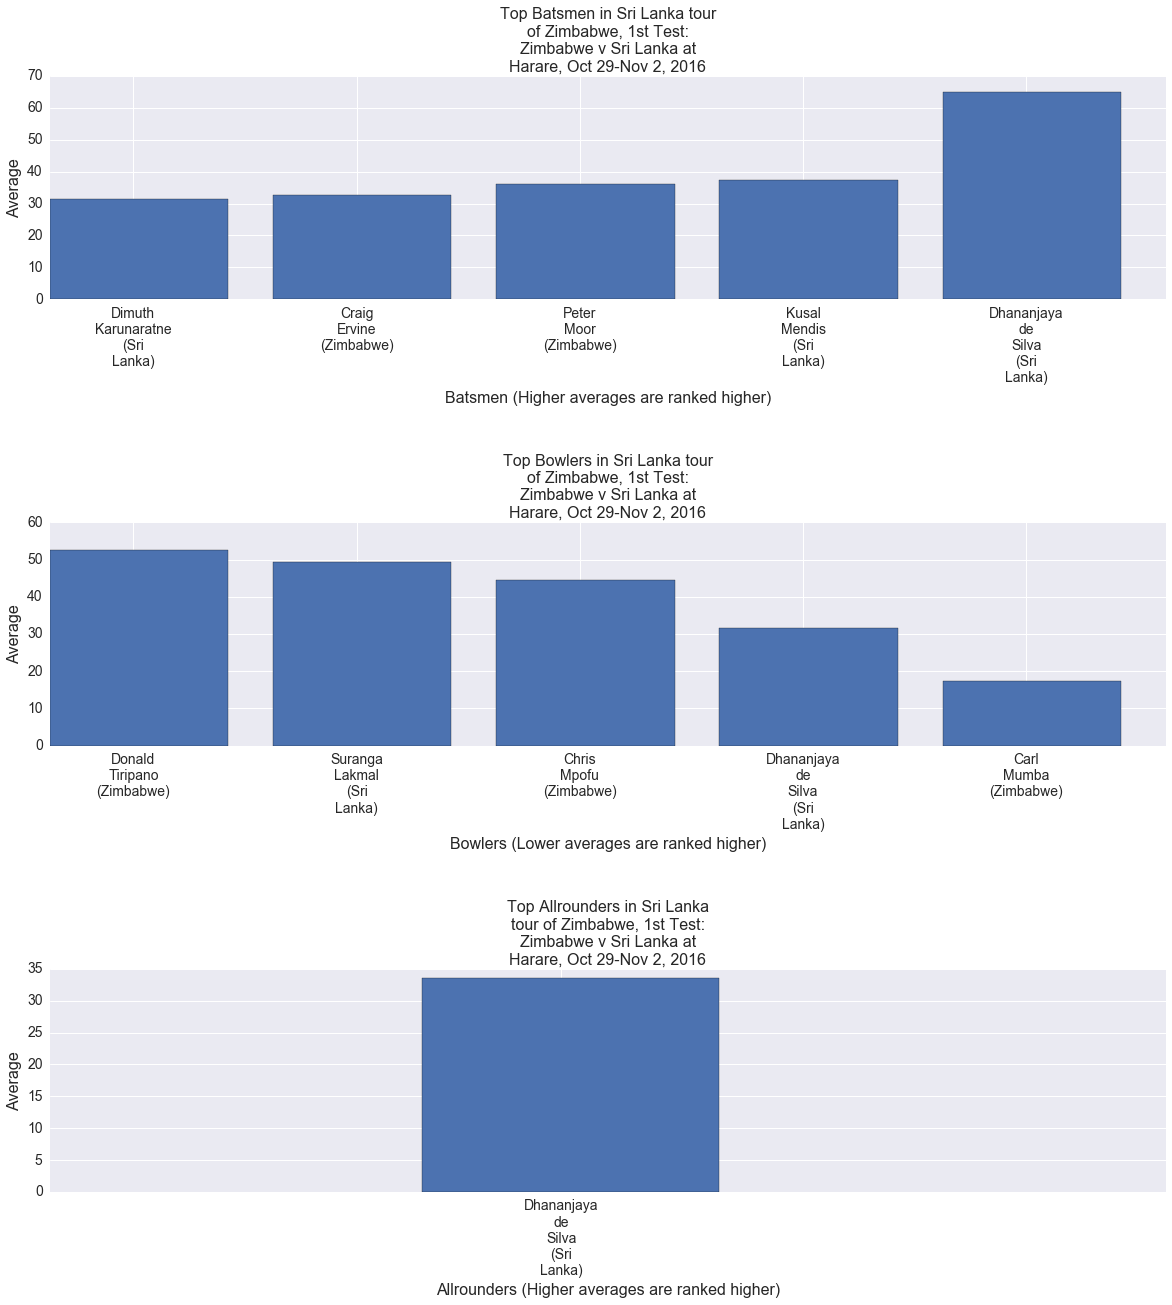

In [53]:
#import file containing visualization code
from visualize import *

#all_rounders are members of all three categories by definition
#visualizes top batting,bowling averages as bar chart
display_top(teamA_bat + teamB_bat + teamA_all + teamB_all, 
            teamA_bowl + teamB_bowl + teamA_all + teamB_all, 
            teamA_all + teamB_all)

Now, we see the historical top performers for both teams in the current rosters. Already, based on our visualization we can make certain insights into the match. We see that the top 5 batsmen has 3 Sri Lankans while the top 5 bowlers has 3 Zimbabweans. From this, we can make a guess that Sri Lanka has a better batsmen while Zimbabwe has better bowlers. However, this is naive as it is only based on some of the players and may give us a biased perspective. Let's make a prediction of both teams capabilities on the batting and bowling front and consider them together.


## Prediction

In [96]:
#average helper
def average(data):
    return float(sum(data)) / max(len(data), 1)


#makes a prediction of a teams' score based on average runs scored per player
def team_bat_avg_prediction(players):
    averages = [get_bat_average(player) for player in players if get_bat_average(player)!=None]
    return math.ceil(average(averages))*11 #number of runs made by a batsmen * number of players

#makes a prediction of a teams' score based on average runs conceded by the bowlers
def team_bowl_avg_prediction(players):
    averages = [get_bowl_average(player) for player in players if get_bowl_average(player)!=None]
    sr_averages = [get_bowl_sr(player) for player in players if get_bowl_sr(player)!=None]
    return (math.ceil(average(averages))*10, #numbers of runs to get a batsmen out * number of batsmen to get out
             math.ceil(average(sr_averages))*10) #number of balls to get a batsmen out * number of batsmen to get out

teamA_bat_pred = team_bat_avg_prediction(teamA_bat + teamA_bowl + teamA_all)
teamA_bowl_pred = team_bowl_avg_prediction(teamA_bowl + teamA_all)
teamB_bat_pred = team_bat_avg_prediction(teamB_bat + teamB_bowl + teamB_all)  
teamB_bowl_pred = team_bowl_avg_prediction(teamB_bowl + teamB_all)
print match.team_1["team_name"] + " :"
print "Batting prediction: "  + str(teamA_bat_pred)
print "Bowling prediction: "  + str(teamA_bowl_pred)
print match.team_2["team_name"] + " :"
print "Batting prediction: "  + str(teamB_bat_pred)
print "Bowling prediction: "  + str(teamB_bowl_pred)

Zimbabwe :
Batting prediction: 209.0
Bowling prediction: (430.0, 760.0)
Sri Lanka :
Batting prediction: 319.0
Bowling prediction: (410.0, 830.0)


First off, we see that the batting prediction calculated looks like a batting score and seems reasonable but you may ask why we have a tuple for our bowling prediction. Part of this is because we can't use bowling averages and batting averages to calculate error as we did to calculate top performers as the actual data we compare both to is the same: the runs scored in the match is equivalent to the runs conceded by the other team! So, we decided to predict both the bowling average, in order to compare with top performers, and the strike rate, in order to get a new data to calculate bowling error for as we can compare it to the actual strike rate for the match.  We can see that based on the averages of all players we have data for in this match, our previous guesses weren't exactly correct. Sri Lanka does have a significantly higher total on average than Zimbabwe. However, Zimbabwe is likely to concede a slightly higher number of runs on average than Sri Lanka while they are also likely to bowl their opponent out quicker. This means that on two of the three metrics we are looking at now, Sri Lanka fares better than Zimbabwe. Does this mean that Zimbabwe has a higher chance of losing this match than Sri Lanka does? We can predict that the outcome of the match will be in favor of Sri Lanka but how accurate can we be in our simple model without considering any other factors such as fielding capabilities, the weather, the pitch and home advantage or even relative matchups? 

## Error and Analysis

In [97]:
#calculates error between actual value and predicted value with respect to predicted value
def get_error(match): 
    runs_scored_teamA = []
    runs_scored_teamB = []
    balls_taken_teamA = []
    balls_taken_teamB = []
    
    bat_first = match.batting_first
    count = 0
    #check who bats first
    if (match.team_1_abbreviation == bat_first):
        for d in match.innings:
            if not int(d["live_current"]): #not live innings; can analyze fully
                if (count%2==0): #alternate innings
                    runs_scored_teamA.append(int(d["runs"]))
                    balls_taken_teamB.append(int(d["balls"]))
                else:
                    runs_scored_teamB.append(int(d["runs"]))
                    balls_taken_teamA.append(int(d["balls"]))
                count+=1
    else:
        for d in match.innings:
            if not int(d["live_current"]): #not live innings; can analyze fully
                if (count%2==0): #alternate innings
                    runs_scored_teamB.append(int(d["runs"]))
                    balls_taken_teamA.append(int(d["balls"]))
                else:
                    runs_scored_teamA.append(int(d["runs"]))
                    balls_taken_teamB.append(int(d["balls"]))
                count+=1
        #calculate error
        teamA_bat_error = [abs(x-teamA_bat_pred)/teamA_bat_pred 
                                   for x in runs_scored_teamA]
        teamB_bat_error = [abs(x-teamB_bat_pred)/teamB_bat_pred 
                                   for x in runs_scored_teamB]
        balls_taken_teamA_pred = teamA_bowl_pred[1]
        balls_taken_teamB_pred = teamB_bowl_pred[1]
        teamA_bowl_error = [abs(x-balls_taken_teamA_pred)/balls_taken_teamA_pred
                           for x in balls_taken_teamA]
        teamB_bowl_error = [abs(x-balls_taken_teamA_pred)/balls_taken_teamB_pred
                           for x in balls_taken_teamB]
        return (average(teamA_bat_error), average(teamB_bat_error), 
               average(teamA_bowl_error), average(teamB_bowl_error))
        
errors = get_error(match)   
print "Team A Batting prediction error: " + str(errors[0])        
print "Team B Batting prediction error: " + str(errors[1])
print "Team A Bowling prediction error: " + str(errors[2])   
print "Team B Bowling prediction error: " + str(errors[3])      

Team A Batting prediction error: 0.784688995215
Team B Batting prediction error: 0.683385579937
Team A Bowling prediction error: 0.223684210526
Team B Bowling prediction error: 0.136144578313


Before we actually start analyzing the error we calculated, let's remember that the bowling
error is NOT the error in the average but the error in the strike rate. We see that the error in the batting average is very high more than 1.5 times are prediction for both teams. This could be due to many reasons but as someone familiar to cricket one may suppose that this is because the grounds in Harare are batsmen-friendly and conducive to high scores. This is further supported by the low (less than 25%) error in the bowling strike rates which is because bowling capabilities aren't much aided by the grounds in this case. 

## Conclusion

As you can see so far, simple Python code can provide us with the data and the analysis and visualization tools needed to make many interesting observation about a game of cricket. While the game we discussed here was a particular one, this code can operate on any live match. This tutorial provides only a glimpse into the huge amount of data that cricket presents. Live cricket match data is harder to find and is also more difficult to make meaningful analysis with. However, even with this obstacle, we have managed to predict correctly based on analysis and visualization the likelihood of a team winning and the error in predicting the respective totals. With more data from previous matches and players comes more scope for analysis and I encourage anyone who found this interesting to go to http://www.espncricinfo.com/ci/content/stats/index.html and play around with the statistics there to find and make even more interesting observations than the ones we've made here. There's a lot of fascinating data in cricket and even more fans who would be very grateful to anyone who can find or analyze these facts that pique their interest!